In [ ]:
#objective: Will the patient survive for at least one year after a heart attack?

In [1]:
#load libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, f1_score, confusion_matrix, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [77]:
#load data
df = pd.read_table('../datasets/echocardiogram.data', sep=",", header=None)
df.columns = ['survival','still_alive','age_heart_attack','per_effusion','frac_shortening',
              'epss','lvdd','wall_motion_score','wall_motion_index','mult','name','group','class']

In [78]:
df_backup = df
df.head()

,survival,still_alive,age_heart_attack,per_effusion,frac_shortening,epss,lvdd,wall_motion_score,wall_motion_index,mult,name,group,class
0,11.0,0,71.0,0,0.260,9.000,4.600,14.0,1.00,1.000,name,1.0,0.0
1,19.0,0,72.0,0,0.380,6.000,4.100,14.0,1.70,0.588,name,1.0,0.0
2,16.0,0,55.0,0,0.260,4.000,3.420,14.0,1.00,1.000,name,1.0,0.0
3,57.0,0,60.0,0,0.253,12.062,4.603,16.0,1.45,0.788,name,1.0,0.0
4,19.0,1,57.0,0,0.160,22.000,5.750,18.0,2.25,0.571,name,1.0,0.0


In [80]:
#remove bad data
#check for missing data
nan_rows = df.isnull().T.any().T.sum()
#drop missing data
df = df.dropna()
df.shape

(61, 13)

In [81]:
#drop name column
df = df.drop('name',axis =1)

In [82]:
df

,survival,still_alive,age_heart_attack,per_effusion,frac_shortening,epss,lvdd,wall_motion_score,wall_motion_index,mult,group,class
0,11.00,0,71.000,0,0.260,9.000,4.600,14.00,1.000,1.000,1.0,0.0
1,19.00,0,72.000,0,0.380,6.000,4.100,14.00,1.700,0.588,1.0,0.0
2,16.00,0,55.000,0,0.260,4.000,3.420,14.00,1.000,1.000,1.0,0.0
3,57.00,0,60.000,0,0.253,12.062,4.603,16.00,1.450,0.788,1.0,0.0
4,19.00,1,57.000,0,0.160,22.000,5.750,18.00,2.250,0.571,1.0,0.0
5,26.00,0,68.000,0,0.260,5.000,4.310,12.00,1.000,0.857,1.0,0.0
6,13.00,0,62.000,0,0.230,31.000,5.430,22.50,1.875,0.857,1.0,0.0
7,50.00,0,60.000,0,0.330,8.000,5.250,14.00,1.000,1.000,1.0,0.0
8,19.00,0,46.000,0,0.340,0.000,5.090,16.00,1.140,1.003,1.0,0.0
9,25.00,0,54.000,0,0.140,13.000,4.490,15.50,1.190,0.930,1.0,0.0


In [83]:
#perform summary statistics
df.describe()

,survival,still_alive,age_heart_attack,per_effusion,frac_shortening,epss,lvdd,wall_motion_score,wall_motion_index,mult,group,class
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,23.122951,0.344262,64.484082,0.180328,0.218754,12.355049,4.830197,15.299016,1.406180,0.790525,1.606557,0.278689
std,17.951765,0.479070,8.697576,0.387651,0.106853,7.355945,0.774510,5.423565,0.449153,0.171295,0.492568,0.452075
min,0.250000,0.000000,46.000000,0.000000,0.010000,0.000000,3.420000,5.500000,1.000000,0.357000,1.000000,0.000000
25%,5.000000,0.000000,58.000000,0.000000,0.150000,8.000000,4.290000,12.500000,1.000000,0.714000,1.000000,0.000000
50%,22.000000,0.000000,62.529000,0.000000,0.220000,11.000000,4.603000,14.000000,1.310000,0.786000,2.000000,0.000000
75%,40.000000,1.000000,70.000000,0.000000,0.270000,16.000000,5.430000,17.000000,1.625000,0.928000,2.000000,1.000000
max,57.000000,1.000000,86.000000,1.000000,0.610000,40.000000,6.730000,39.000000,3.000000,1.003000,2.000000,1.000000


In [84]:
#drop group
df = df.drop('group',axis = 1)

In [85]:
#encode columns
df_cat = df[['still_alive','per_effusion']]

In [86]:
df_cat2 = pd.get_dummies(df_cat, columns=['still_alive', 'per_effusion'], drop_first=False)

In [93]:
df_cat2

,still_alive_0,still_alive_1,per_effusion_0,per_effusion_1
0,1,0,1,0
1,1,0,1,0
2,1,0,1,0
3,1,0,1,0
4,0,1,1,0
5,1,0,1,0
6,1,0,1,0
7,1,0,1,0
8,1,0,1,0
9,1,0,1,0


In [87]:
#scale cts data
scaler = preprocessing.StandardScaler()
to_scale_df = df[['survival','age_heart_attack','frac_shortening',
              'epss','lvdd','wall_motion_score','wall_motion_index','mult']]
scaled_df = scaler.fit_transform(to_scale_df)
scaled_df = pd.DataFrame(scaled_df, columns=['survival','age_heart_attack','frac_shortening',
              'epss','lvdd','wall_motion_score','wall_motion_index','mult'])

In [92]:
scaled_df

,survival,age_heart_attack,frac_shortening,epss,lvdd,wall_motion_score,wall_motion_index,mult
0,-0.680911,0.755382,0.389208,-0.459886,-0.299682,-0.241501,-0.911830,1.233040
1,-0.231574,0.871311,1.521564,-0.871103,-0.950609,-0.241501,0.659593,-1.192126
2,-0.400076,-1.099478,0.389208,-1.145249,-1.835870,-0.241501,-0.911830,1.233040
3,1.902776,-0.519834,0.323154,-0.040169,-0.295777,0.130320,0.098370,-0.014861
4,-0.231574,-0.867620,-0.554421,1.322059,1.197449,0.502142,1.894282,-1.292193
5,0.161596,0.407596,0.389208,-1.008176,-0.677220,-0.613323,-0.911830,0.391296
6,-0.568577,-0.287976,0.106120,2.555713,0.780856,1.338740,1.052448,0.391296
7,1.509606,-0.519834,1.049749,-0.596958,0.546523,-0.241501,-0.911830,1.233040
8,-0.231574,-2.142836,1.144112,-1.693539,0.338226,0.130320,-0.597545,1.250699
9,0.105428,-1.215406,-0.743147,0.088405,-0.442886,0.037365,-0.485301,0.820998


In [94]:
df['class']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     1.0
11     0.0
12     0.0
13     0.0
14     1.0
15     0.0
16     1.0
17     1.0
18     0.0
19     1.0
20     1.0
21     1.0
22     1.0
23     1.0
29     0.0
35     0.0
40     0.0
41     0.0
42     0.0
47     0.0
      ... 
53     1.0
54     0.0
55     0.0
56     0.0
57     0.0
59     0.0
61     0.0
64     0.0
66     0.0
67     0.0
68     0.0
69     1.0
70     0.0
71     0.0
72     0.0
74     0.0
77     0.0
80     0.0
82     1.0
87     0.0
91     0.0
95     0.0
97     1.0
98     1.0
101    0.0
103    1.0
104    0.0
105    0.0
107    1.0
108    1.0
Name: class, Length: 61, dtype: float64

In [96]:
#combine data
#df_new = pd.concat ([scaled_df,df_cat2,df['class']],axis=1)
df_new = pd.concat([scaled_df, df_cat2, df['class']], axis=1)
df_new

,survival,age_heart_attack,frac_shortening,epss,lvdd,wall_motion_score,wall_motion_index,mult,still_alive_0,still_alive_1,per_effusion_0,per_effusion_1,class
0,-0.680911,0.755382,0.389208,-0.459886,-0.299682,-0.241501,-0.911830,1.233040,1.0,0.0,1.0,0.0,0.0
1,-0.231574,0.871311,1.521564,-0.871103,-0.950609,-0.241501,0.659593,-1.192126,1.0,0.0,1.0,0.0,0.0
2,-0.400076,-1.099478,0.389208,-1.145249,-1.835870,-0.241501,-0.911830,1.233040,1.0,0.0,1.0,0.0,0.0
3,1.902776,-0.519834,0.323154,-0.040169,-0.295777,0.130320,0.098370,-0.014861,1.0,0.0,1.0,0.0,0.0
4,-0.231574,-0.867620,-0.554421,1.322059,1.197449,0.502142,1.894282,-1.292193,0.0,1.0,1.0,0.0,0.0
5,0.161596,0.407596,0.389208,-1.008176,-0.677220,-0.613323,-0.911830,0.391296,1.0,0.0,1.0,0.0,0.0
6,-0.568577,-0.287976,0.106120,2.555713,0.780856,1.338740,1.052448,0.391296,1.0,0.0,1.0,0.0,0.0
7,1.509606,-0.519834,1.049749,-0.596958,0.546523,-0.241501,-0.911830,1.233040,1.0,0.0,1.0,0.0,0.0
8,-0.231574,-2.142836,1.144112,-1.693539,0.338226,0.130320,-0.597545,1.250699,1.0,0.0,1.0,0.0,0.0
9,0.105428,-1.215406,-0.743147,0.088405,-0.442886,0.037365,-0.485301,0.820998,1.0,0.0,1.0,0.0,0.0


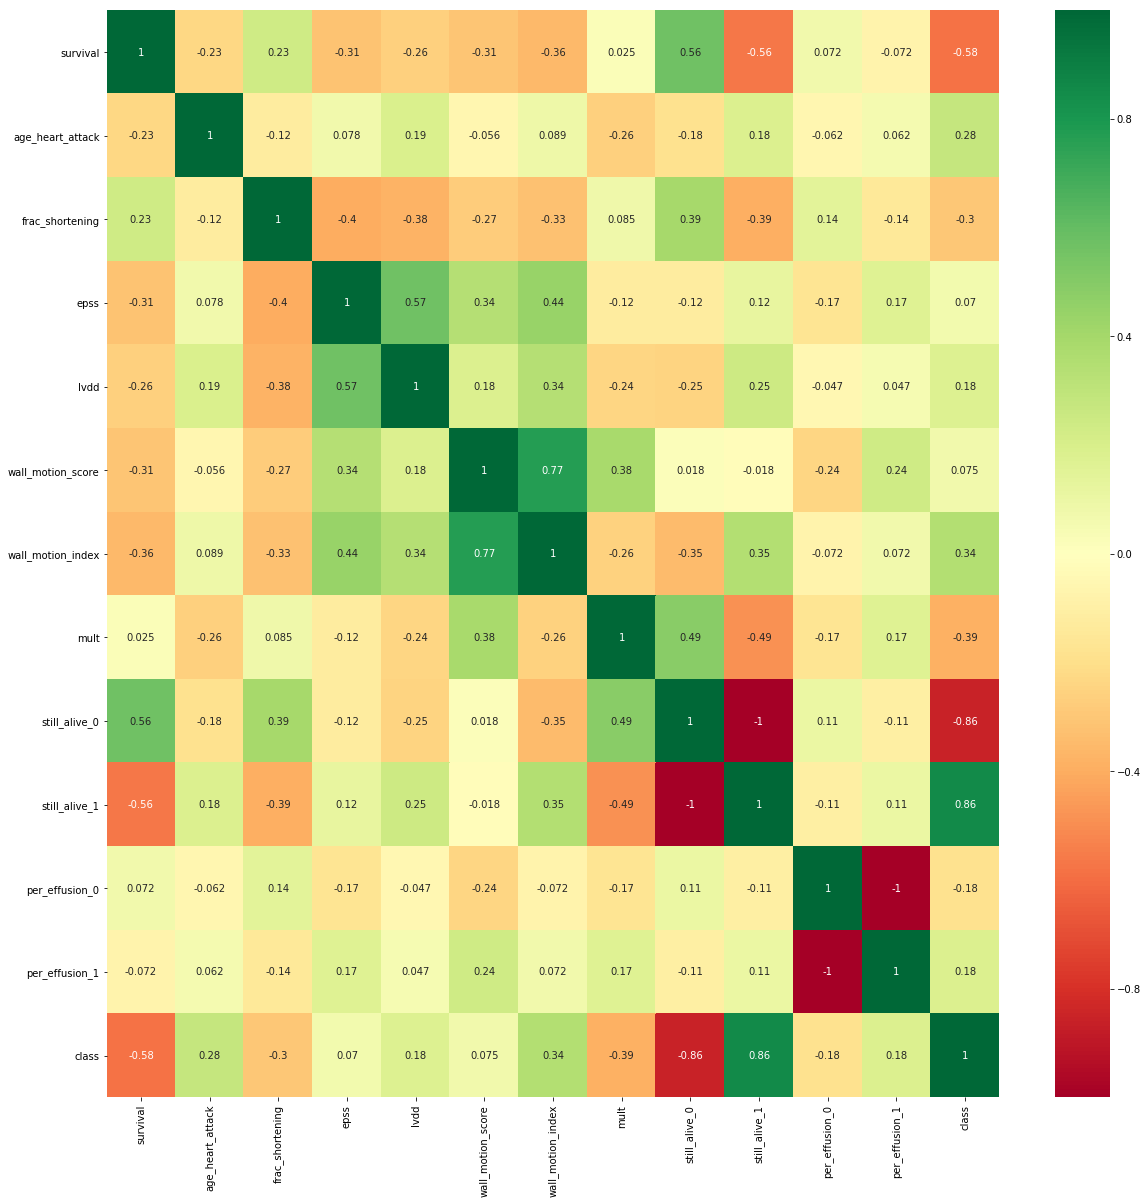

In [89]:
#check correlation
x = df_new.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(x,cmap='RdYlGn',annot=True)
plt.show();

In [35]:
#data split
X = df_new.drop('class', axis=1)
y = df_new[['class']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [90]:
df_new

,survival,age_heart_attack,frac_shortening,epss,lvdd,wall_motion_score,wall_motion_index,mult,still_alive_0,still_alive_1,per_effusion_0,per_effusion_1,class
0,-0.680911,0.755382,0.389208,-0.459886,-0.299682,-0.241501,-0.911830,1.233040,1.0,0.0,1.0,0.0,0.0
1,-0.231574,0.871311,1.521564,-0.871103,-0.950609,-0.241501,0.659593,-1.192126,1.0,0.0,1.0,0.0,0.0
2,-0.400076,-1.099478,0.389208,-1.145249,-1.835870,-0.241501,-0.911830,1.233040,1.0,0.0,1.0,0.0,0.0
3,1.902776,-0.519834,0.323154,-0.040169,-0.295777,0.130320,0.098370,-0.014861,1.0,0.0,1.0,0.0,0.0
4,-0.231574,-0.867620,-0.554421,1.322059,1.197449,0.502142,1.894282,-1.292193,0.0,1.0,1.0,0.0,0.0
5,0.161596,0.407596,0.389208,-1.008176,-0.677220,-0.613323,-0.911830,0.391296,1.0,0.0,1.0,0.0,0.0
6,-0.568577,-0.287976,0.106120,2.555713,0.780856,1.338740,1.052448,0.391296,1.0,0.0,1.0,0.0,0.0
7,1.509606,-0.519834,1.049749,-0.596958,0.546523,-0.241501,-0.911830,1.233040,1.0,0.0,1.0,0.0,0.0
8,-0.231574,-2.142836,1.144112,-1.693539,0.338226,0.130320,-0.597545,1.250699,1.0,0.0,1.0,0.0,0.0
9,0.105428,-1.215406,-0.743147,0.088405,-0.442886,0.037365,-0.485301,0.820998,1.0,0.0,1.0,0.0,0.0


In [40]:
#design model
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
#perform classification
array = df_new.values
X = array[:,0:12]
Y = array[:,12]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('GB', GradientBoostingClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').